In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import os
import datetime
%matplotlib inline

In [36]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [37]:
pd.set_option('max_columns', 35, 'max_rows', 20)

In [38]:
# 데이터 불러오기
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('testset_final.csv')
train = pd.read_csv('trainset.csv')

In [39]:
train

,SEQ,접수일,접수시각,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,고객ID,고객가입일,반려동물,부재중여부,우선청소,쿠폰사용여부,매니저생년월일,매니저ID,매니저최초가입일,매니저최초서비스일,매니저성별,매니저사용휴대폰,매니저주소,매니저이동방법,근무가능지역,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,추천인여부,매칭성공여부
0,T06420,2019-07-09,NaN,1,2019-07-15,3,3,2019-07-29,09:00:00,13:00:00,1,무통장입금,충남 천안시,일반주택,NaN,CLEAN_MY_ID_38,2019-04-22,NaN,NaN,NaN,0,1956-04-19,HELPER_ID_437,2020-04-02,2020-06-30,0,안드로이드,서울 양천구,대중교통,서울,0.0,0.0,1,0,0
1,T15430,2019-07-12,NaN,1,2019-07-15,4,3,2019-08-20,10:00:00,16:00:00,1,무통장입금,충남 천안시,일반주택,NaN,CLEAN_MY_ID_171,2019-05-21,없음,NaN,NaN,0,1976-06-10,HELPER_ID_635,2020-10-30,2020-11-12,0,안드로이드,충남 천안시,대중교통,천안/아산,1.0,1.0,1,0,0
2,T23790,2020-11-18,NaN,1,2020-11-23,10,6,2020-12-11,09:00:00,13:00:00,1,신용카드,충남 천안시,일반주택,40평대이상,CLEAN_MY_ID_4663,2020-10-14,없음,0.0,NaN,0,1970-04-05,HELPER_ID_39,2019-03-29,2019-04-04,0,안드로이드,충남 천안시,대중교통,천안/아산,0.0,0.0,0,0,0
3,T18740,2020-11-09,NaN,1,2020-11-09,4,4,2020-11-30,09:00:00,14:00:00,1,무통장입금,서울 강서구,일반주택,30평대,CLEAN_MY_ID_1734,2020-02-06,없음,0.0,방,0,1956-04-19,HELPER_ID_437,2020-04-02,2020-06-30,0,안드로이드,서울 양천구,대중교통,서울,0.0,0.0,1,0,0
4,T08451,2020-02-25,NaN,1,2020-03-31,2,2,2020-04-07,09:00:00,13:00:00,1,무통장입금,충남 천안시,일반주택,NaN,CLEAN_MY_ID_723,2019-09-20,NaN,NaN,NaN,0,1966-03-24,HELPER_ID_201,2019-09-16,2019-09-18,0,안드로이드,충남 천안시,대중교통,천안/아산,0.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23004,T17071,2021-01-05,11:11:15,1,2021-01-06,4,1,2021-01-06,16:00:00,18:00:00,1,신용카드,강원 원주시,오피스텔/원룸,20평대,CLEAN_MY_ID_4839,2020-11-25,고양이,1.0,거실,0,1970-04-04,HELPER_ID_245,2019-10-21,2019-10-23,0,안드로이드,충남 세종시,자차,천안/아산,0.0,0.0,1,0,0
23005,T01336,2020-02-03,NaN,1,2020-03-02,10,9,2020-06-15,14:00:00,18:00:00,1,신용카드,충남 아산시,일반주택,NaN,CLEAN_MY_ID_222,2019-06-10,없음,NaN,NaN,1,1969-03-17,HELPER_ID_113,2019-06-26,2019-06-27,0,안드로이드,충남 아산시,대중교통,천안/아산,0.0,0.0,1,0,1
23006,T00544,2021-04-30,21:48:21,1,2021-05-20,4,3,2021-06-16,09:00:00,13:00:00,1,신용카드,강원 원주시,일반주택,30평대,CLEAN_MY_ID_4974,2021-01-26,없음,1.0,NaN,0,1971-02-03,HELPER_ID_62,2019-04-25,2019-04-29,0,안드로이드,충남 천안시,대중교통,천안/아산,0.0,0.0,1,0,0
23007,T19297,2019-07-08,NaN,1,2019-07-10,4,3,2019-07-24,14:00:00,18:00:00,1,신용카드,충남 아산시,일반주택,NaN,CLEAN_MY_ID_331,2019-07-06,NaN,NaN,NaN,0,1967-01-20,HELPER_ID_549,2020-07-24,2020-08-20,0,안드로이드,충남 천안시,자차,천안/아산,1.0,1.0,1,0,0


In [44]:
train = train[['SEQ', '접수일', '접수시각', '장기서비스여부', '최초서비스일', '전체회차', '현재회차', '서비스일자',
       '서비스시작시간', '서비스종료시간', '기존고객여부', '결재형태', '서비스주소', '주거형태', '평수', '고객가입일',
       '반려동물', '부재중여부', '우선청소', '쿠폰사용여부', '매니저생년월일', '매니저성별', '매니저사용휴대폰',
       '매니저이동방법', '근무가능지역', 'CS교육이수여부', '청소교육이수여부', '부재중서비스가능여부', '추천인여부','매칭성공여부']]

In [45]:
train.head()

,SEQ,접수일,접수시각,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,서비스주소,주거형태,평수,고객가입일,반려동물,부재중여부,우선청소,쿠폰사용여부,매니저생년월일,매니저성별,매니저사용휴대폰,매니저이동방법,근무가능지역,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,추천인여부,매칭성공여부
0,T06420,2019-07-09,NaN,1,2019-07-15,3,3,2019-07-29,09:00:00,13:00:00,1,무통장입금,충남 천안시,일반주택,NaN,2019-04-22,NaN,NaN,NaN,0,1956-04-19,0,안드로이드,대중교통,서울,0.0,0.0,1,0,0
1,T15430,2019-07-12,NaN,1,2019-07-15,4,3,2019-08-20,10:00:00,16:00:00,1,무통장입금,충남 천안시,일반주택,NaN,2019-05-21,없음,NaN,NaN,0,1976-06-10,0,안드로이드,대중교통,천안/아산,1.0,1.0,1,0,0
2,T23790,2020-11-18,NaN,1,2020-11-23,10,6,2020-12-11,09:00:00,13:00:00,1,신용카드,충남 천안시,일반주택,40평대이상,2020-10-14,없음,0.0,NaN,0,1970-04-05,0,안드로이드,대중교통,천안/아산,0.0,0.0,0,0,0
3,T18740,2020-11-09,NaN,1,2020-11-09,4,4,2020-11-30,09:00:00,14:00:00,1,무통장입금,서울 강서구,일반주택,30평대,2020-02-06,없음,0.0,방,0,1956-04-19,0,안드로이드,대중교통,서울,0.0,0.0,1,0,0
4,T08451,2020-02-25,NaN,1,2020-03-31,2,2,2020-04-07,09:00:00,13:00:00,1,무통장입금,충남 천안시,일반주택,NaN,2019-09-20,NaN,NaN,NaN,0,1966-03-24,0,안드로이드,대중교통,천안/아산,0.0,0.0,1,0,1


In [43]:
test.서비스시작시간.unique()

array(['9:00:00', '14:00:00', '10:00:00', '8:00:00', '11:00:00',
       '15:00:00', '13:00:00', '16:00:00', '12:00:00', '6:00:00',
       '18:00:00'], dtype=object)

In [49]:
len('9:00:00')

7

In [16]:
#train 데이터에서 결과값만 따로 저장
#y_train = train['매칭성공여부']
#y_train.to_csv('y_train.csv',index=False, encoding='cp949')

In [46]:
# train 데이터에서 매칭성공 여부 삭제
del train['매칭성공여부']

In [47]:
train['서비스시작시간'] = train['서비스시작시간'].apply(lambda x:x[:2]).astype('int')
train['서비스종료시간'] = train['서비스종료시간'].apply(lambda x:x[:2]).astype('int')

In [51]:
test['서비스시작시간'] = test['서비스시작시간'].apply(lambda x:x[:1] if len(x)==7 else x[:2]).astype('int')
test['서비스종료시간'] = test['서비스종료시간'].apply(lambda x:x[:1] if len(x)==7 else x[:2]).astype('int')

In [64]:
train['매니저생년월일'] = train['매니저생년월일'].apply(lambda x:x[:4]).astype('int')

In [66]:
# train 데이터와 test데이터 합치기
tr = pd.concat([train, test]).reset_index(drop=True)


In [67]:
tr.dtypes

SEQ            object
접수일            object
접수시각           object
장기서비스여부         int64
최초서비스일         object
               ...   
근무가능지역         object
CS교육이수여부      float64
청소교육이수여부      float64
부재중서비스가능여부      int64
추천인여부           int64
Length: 29, dtype: object

# Feature Generation

In [68]:
features = pd.DataFrame({'SEQ': tr.SEQ.unique()})

In [69]:
features

,SEQ
0,T06420
1,T15430
2,T23790
3,T18740
4,T08451
...,...
27248,T31589
27249,T36236
27250,T34729
27251,T53830


### 서비스이용시간

In [70]:
features['서비스이용시간']=tr.서비스종료시간-tr.서비스시작시간
features

,SEQ,서비스이용시간
0,T06420,4
1,T15430,6
2,T23790,4
3,T18740,5
4,T08451,4
...,...,...
27248,T31589,4
27249,T36236,4
27250,T34729,4
27251,T53830,4


In [71]:
tr.columns

Index(['SEQ', '접수일', '접수시각', '장기서비스여부', '최초서비스일', '전체회차', '현재회차', '서비스일자',
       '서비스시작시간', '서비스종료시간', '기존고객여부', '결재형태', '서비스주소', '주거형태', '평수', '고객가입일',
       '반려동물', '부재중여부', '우선청소', '쿠폰사용여부', '매니저생년월일', '매니저성별', '매니저사용휴대폰',
       '매니저이동방법', '근무가능지역', 'CS교육이수여부', '청소교육이수여부', '부재중서비스가능여부', '추천인여부'],
      dtype='object')

In [72]:
train.매니저생년월일

0        1956
1        1976
2        1970
3        1956
4        1966
         ... 
23004    1970
23005    1969
23006    1971
23007    1967
23008    1968
Name: 매니저생년월일, Length: 23009, dtype: int32

In [73]:
test.매니저생년월일

0       1961
1       1961
2       1969
3       1961
4       1964
        ... 
4239    1961
4240    1976
4241    1961
4242    1964
4243    1971
Name: 매니저생년월일, Length: 4244, dtype: int64

## 매니저 나이

In [75]:
features['매니저나이'] = 2021 - tr.매니저생년월일.astype('int')

In [76]:
features

,SEQ,서비스이용시간,매니저나이
0,T06420,4,65
1,T15430,6,45
2,T23790,4,51
3,T18740,5,65
4,T08451,4,55
...,...,...,...
27248,T31589,4,60
27249,T36236,4,45
27250,T34729,4,60
27251,T53830,4,57


## 부재중서비스매칭

In [77]:
features['부재중서비스매칭'] = (tr.부재중서비스가능여부 == tr.부재중여부).apply(lambda x:0 if x == False else 1)
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭
0,T06420,4,65,0
1,T15430,6,45,0
2,T23790,4,51,1
3,T18740,5,65,0
4,T08451,4,55,0
...,...,...,...,...
27248,T31589,4,60,0
27249,T36236,4,45,0
27250,T34729,4,60,0
27251,T53830,4,57,0


## 서비스요청요일

In [78]:
features['서비스요청요일'] = tr.서비스일자.astype('datetime64').apply(lambda x: x.weekday()).apply(lambda x: '주말' if x in [5,6] else '평일')
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일
0,T06420,4,65,0,평일
1,T15430,6,45,0,평일
2,T23790,4,51,1,평일
3,T18740,5,65,0,평일
4,T08451,4,55,0,평일
...,...,...,...,...,...
27248,T31589,4,60,0,평일
27249,T36236,4,45,0,평일
27250,T34729,4,60,0,평일
27251,T53830,4,57,0,평일


## 서비스 요청계절

In [79]:
def season(x):
    if x in [3,4,5]:
        return '봄'
    elif x in [6,7,8]:
        return '여름'
    elif x in [9,10,11]:
        return '가을'
    else:
        return '겨울'

In [80]:
features['서비스요청계절']=tr.서비스일자.apply(lambda x:x[5:7]).astype(int).apply(season)
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절
0,T06420,4,65,0,평일,여름
1,T15430,6,45,0,평일,여름
2,T23790,4,51,1,평일,겨울
3,T18740,5,65,0,평일,가을
4,T08451,4,55,0,평일,봄
...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을
27249,T36236,4,45,0,평일,겨울
27250,T34729,4,60,0,평일,겨울
27251,T53830,4,57,0,평일,겨울


## 반려동물여부

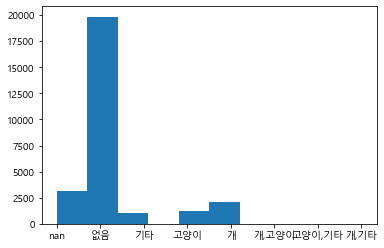

In [81]:
plt.hist(list(tr.반려동물))
plt.show()
# 히스토그램 결과 없음이 많으므로 결측치를 '없음으로' 대체

In [82]:
features['반려동물여부']= tr.반려동물.fillna('없음').apply(lambda x:0 if x =='없음' else 1)
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부
0,T06420,4,65,0,평일,여름,0
1,T15430,6,45,0,평일,여름,0
2,T23790,4,51,1,평일,겨울,0
3,T18740,5,65,0,평일,가을,0
4,T08451,4,55,0,평일,봄,0
...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0
27249,T36236,4,45,0,평일,겨울,0
27250,T34729,4,60,0,평일,겨울,0
27251,T53830,4,57,0,평일,겨울,0


## 우선청소여부

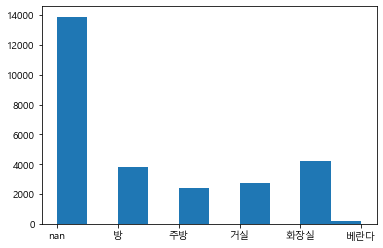

In [83]:
plt.hist(list(tr.우선청소))
plt.show()

In [84]:
features['우선청소여부'] = tr.우선청소.fillna('없음').apply(lambda x:0 if x =='없음' else 1)
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부,우선청소여부
0,T06420,4,65,0,평일,여름,0,0
1,T15430,6,45,0,평일,여름,0,0
2,T23790,4,51,1,평일,겨울,0,0
3,T18740,5,65,0,평일,가을,0,1
4,T08451,4,55,0,평일,봄,0,0
...,...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0,1
27249,T36236,4,45,0,평일,겨울,0,0
27250,T34729,4,60,0,평일,겨울,0,1
27251,T53830,4,57,0,평일,겨울,0,0


In [86]:
train.근무가능지역.unique()

array(['서울', '천안/아산', '원주/춘천', '기타', '평택', '광주', '수도권', '부산'],
      dtype=object)

In [87]:
test.근무가능지역.unique()

array(['원주/춘천', '천안/아산', '기타', '부산', '광주', '서울', '평택', '수도권'],
      dtype=object)

In [90]:
train.서비스주소.unique()

array(['충남 천안시', '서울 강서구', '충남 아산시', '강원 원주시', '광주 북구', '서울 은평구',
       '서울 용산구', '서울 강동구', '서울 강남구', '경기 평택시', '강원 춘천시', '경기 성남시',
       '서울 영등포구', '서울 금천구', '광주 남구', '서울 동작구', '부산 강서구', '광주 광산구',
       '광주 서구', '서울 동대문구', '서울 관악구', '경기 의정부시', '서울 성동구', '부산 연제구',
       '서울 중구', '서울 성북구', '서울 서초구', '경기 안성시', '서울 강북구', '경남 창원시',
       '서울 마포구', '부산 해운대구', '광주 동구', '부산 사하구', '서울 서대문구', '서울 종로구',
       '서울 도봉구', '부산 동래구', '서울 노원구', '부산 동구', '서울 중랑구', '서울 구로구'],
      dtype=object)

In [89]:
test.서비스주소.unique()

array(['충남 천안시', '충남 아산시', '서울 강남구', '서울 용산구', '서울 은평구', '서울 마포구',
       '서울 강서구', '서울 동작구', '서울 영등포구', '서울 중구', '서울 도봉구', '서울 강동구',
       '서울 성동구', '서울 서초구', '서울 강북구', '서울 동대문구', '서울 관악구', '경기 평택시',
       '경기 의정부시', '강원 원주시', '강원 춘천시', '서울 종로구', '광주 남구', '광주 서구',
       '서울 금천구', '서울 서대문구', '광주 북구', '광주 광산구', '광주 동구', '경기 안성시',
       '서울 중랑구', '서울 성북구', '부산 강서구', '부산 연제구', '부산 동구', '부산 해운대구',
       '부산 북구', '부산 사하구', '서울 노원구', '경기 화성시', '서울 광진구', '경기 성남시',
       '서울 구로구', '서울 송파구', '부산 부산진구', '부산 금정구', '부산 사상구'], dtype=object)

## 주소매칭여부

In [91]:
tr['근무가능지역'] = tr['근무가능지역'].apply(lambda x:x[:2])
tr['서비스주소'] = tr['서비스주소'].apply(lambda x:x[:2])

In [92]:
tr.근무가능지역.unique()

array(['서울', '천안', '원주', '기타', '평택', '광주', '수도', '부산'], dtype=object)

In [93]:
tr.서비스주소.unique()

array(['충남', '서울', '강원', '광주', '경기', '부산', '경남'], dtype=object)

In [94]:
tr.근무가능지역 = tr.근무가능지역.map({'서울':'서울',
                                       '천안':'충남',
                                       '원주':'강원',
                                       '평택':'충남',
                                       '광주':'광주',
                                       '수도':'경기',
                                       '부산':'부산',
                                       '기타':'기타'})

In [96]:
features['주소매칭여부'] = (tr['서비스주소']==tr['근무가능지역']).apply(lambda x:0 if x == False else 1)

In [97]:
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부,우선청소여부,주소매칭여부
0,T06420,4,65,0,평일,여름,0,0,0
1,T15430,6,45,0,평일,여름,0,0,1
2,T23790,4,51,1,평일,겨울,0,0,1
3,T18740,5,65,0,평일,가을,0,1,1
4,T08451,4,55,0,평일,봄,0,0,1
...,...,...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0,1,1
27249,T36236,4,45,0,평일,겨울,0,0,1
27250,T34729,4,60,0,평일,겨울,0,1,1
27251,T53830,4,57,0,평일,겨울,0,0,1


## 미리예약

In [98]:
# 서비스일자와 서비스신청 일 간의 차이

In [99]:
features['미리예약']= tr.서비스일자.astype('datetime64') - tr.접수일.astype('datetime64')
features['미리예약'] = features['미리예약'].dt.days
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부,우선청소여부,주소매칭여부,미리예약
0,T06420,4,65,0,평일,여름,0,0,0,20
1,T15430,6,45,0,평일,여름,0,0,1,39
2,T23790,4,51,1,평일,겨울,0,0,1,23
3,T18740,5,65,0,평일,가을,0,1,1,21
4,T08451,4,55,0,평일,봄,0,0,1,42
...,...,...,...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0,1,1,7
27249,T36236,4,45,0,평일,겨울,0,0,1,6
27250,T34729,4,60,0,평일,겨울,0,1,1,7
27251,T53830,4,57,0,평일,겨울,0,0,1,49


## 가입기간

In [100]:
features['가입기간']= (tr.접수일.astype('datetime64')-tr.고객가입일.astype('datetime64')).dt.days

In [101]:
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부,우선청소여부,주소매칭여부,미리예약,가입기간
0,T06420,4,65,0,평일,여름,0,0,0,20,78.0
1,T15430,6,45,0,평일,여름,0,0,1,39,52.0
2,T23790,4,51,1,평일,겨울,0,0,1,23,35.0
3,T18740,5,65,0,평일,가을,0,1,1,21,277.0
4,T08451,4,55,0,평일,봄,0,0,1,42,158.0
...,...,...,...,...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0,1,1,7,228.0
27249,T36236,4,45,0,평일,겨울,0,0,1,6,-6.0
27250,T34729,4,60,0,평일,겨울,0,1,1,7,609.0
27251,T53830,4,57,0,평일,겨울,0,0,1,49,196.0


In [102]:
features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부,우선청소여부,주소매칭여부,미리예약,가입기간
0,T06420,4,65,0,평일,여름,0,0,0,20,78.0
1,T15430,6,45,0,평일,여름,0,0,1,39,52.0
2,T23790,4,51,1,평일,겨울,0,0,1,23,35.0
3,T18740,5,65,0,평일,가을,0,1,1,21,277.0
4,T08451,4,55,0,평일,봄,0,0,1,42,158.0
...,...,...,...,...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0,1,1,7,228.0
27249,T36236,4,45,0,평일,겨울,0,0,1,6,-6.0
27250,T34729,4,60,0,평일,겨울,0,1,1,7,609.0
27251,T53830,4,57,0,평일,겨울,0,0,1,49,196.0


# 기존데이터 feature

## 현재회차

In [103]:
f = tr[['SEQ','현재회차']];f

,SEQ,현재회차
0,T06420,3
1,T15430,3
2,T23790,6
3,T18740,4
4,T08451,2
...,...,...
27248,T31589,1
27249,T36236,1
27250,T34729,1
27251,T53830,6


In [104]:
features = features.merge(f, how='left'); features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부,우선청소여부,주소매칭여부,미리예약,가입기간,현재회차
0,T06420,4,65,0,평일,여름,0,0,0,20,78.0,3
1,T15430,6,45,0,평일,여름,0,0,1,39,52.0,3
2,T23790,4,51,1,평일,겨울,0,0,1,23,35.0,6
3,T18740,5,65,0,평일,가을,0,1,1,21,277.0,4
4,T08451,4,55,0,평일,봄,0,0,1,42,158.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0,1,1,7,228.0,1
27249,T36236,4,45,0,평일,겨울,0,0,1,6,-6.0,1
27250,T34729,4,60,0,평일,겨울,0,1,1,7,609.0,1
27251,T53830,4,57,0,평일,겨울,0,0,1,49,196.0,6


## CS교육이수여부

In [105]:
f = tr[['SEQ','CS교육이수여부']]
features = features.merge(f, how='left'); features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부,우선청소여부,주소매칭여부,미리예약,가입기간,현재회차,CS교육이수여부
0,T06420,4,65,0,평일,여름,0,0,0,20,78.0,3,0.0
1,T15430,6,45,0,평일,여름,0,0,1,39,52.0,3,1.0
2,T23790,4,51,1,평일,겨울,0,0,1,23,35.0,6,0.0
3,T18740,5,65,0,평일,가을,0,1,1,21,277.0,4,0.0
4,T08451,4,55,0,평일,봄,0,0,1,42,158.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0,1,1,7,228.0,1,0.0
27249,T36236,4,45,0,평일,겨울,0,0,1,6,-6.0,1,NaN
27250,T34729,4,60,0,평일,겨울,0,1,1,7,609.0,1,0.0
27251,T53830,4,57,0,평일,겨울,0,0,1,49,196.0,6,0.0


In [106]:
sum(features.CS교육이수여부.isna())

3228

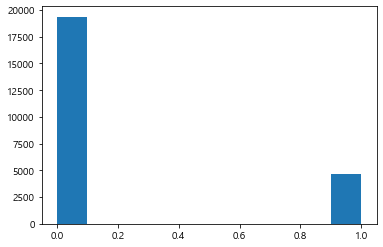

In [107]:
plt.hist(list(features.CS교육이수여부))
plt.show()

In [108]:
features['CS교육이수여부'] = features['CS교육이수여부'].fillna(0)

## 청소교육이수여부

In [109]:
f = tr[['SEQ','청소교육이수여부']]
features = features.merge(f, how='left'); features

,SEQ,서비스이용시간,매니저나이,부재중서비스매칭,서비스요청요일,서비스요청계절,반려동물여부,우선청소여부,주소매칭여부,미리예약,가입기간,현재회차,CS교육이수여부,청소교육이수여부
0,T06420,4,65,0,평일,여름,0,0,0,20,78.0,3,0.0,0.0
1,T15430,6,45,0,평일,여름,0,0,1,39,52.0,3,1.0,1.0
2,T23790,4,51,1,평일,겨울,0,0,1,23,35.0,6,0.0,0.0
3,T18740,5,65,0,평일,가을,0,1,1,21,277.0,4,0.0,0.0
4,T08451,4,55,0,평일,봄,0,0,1,42,158.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,T31589,4,60,0,평일,가을,0,1,1,7,228.0,1,0.0,0.0
27249,T36236,4,45,0,평일,겨울,0,0,1,6,-6.0,1,0.0,NaN
27250,T34729,4,60,0,평일,겨울,0,1,1,7,609.0,1,0.0,0.0
27251,T53830,4,57,0,평일,겨울,0,0,1,49,196.0,6,0.0,0.0


In [110]:
sum(features.청소교육이수여부.isna())

3228

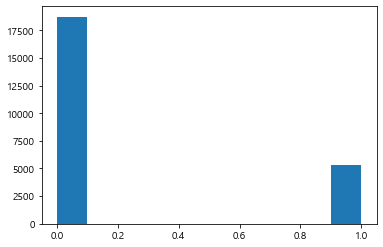

In [111]:
plt.hist(list(features.청소교육이수여부))
plt.show()

In [112]:
features['청소교육이수여부'] = features['청소교육이수여부'].fillna(0)

In [113]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 27252
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQ       27253 non-null  object 
 1   서비스이용시간   27253 non-null  int32  
 2   매니저나이     27253 non-null  int32  
 3   부재중서비스매칭  27253 non-null  int64  
 4   서비스요청요일   27253 non-null  object 
 5   서비스요청계절   27253 non-null  object 
 6   반려동물여부    27253 non-null  int64  
 7   우선청소여부    27253 non-null  int64  
 8   주소매칭여부    27253 non-null  int64  
 9   미리예약      27253 non-null  int64  
 10  가입기간      27093 non-null  float64
 11  현재회차      27253 non-null  int64  
 12  CS교육이수여부  27253 non-null  float64
 13  청소교육이수여부  27253 non-null  float64
dtypes: float64(3), int32(2), int64(6), object(3)
memory usage: 2.9+ MB


In [115]:
X_train = features.iloc[0:23009]
X_train.to_csv('X_train.csv', index=False, encoding='cp949')

X_test = features.iloc[23009:]
X_test.to_csv('X_test.csv', index=False, encoding='cp949')